In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dfTrain = pd.read_csv(r"UNSW_2018_IoT_Botnet_V6_Train.csv", sep=",", low_memory=False)
dfTest = pd.read_csv(r"UNSW_2018_IoT_Botnet_V6_Test.csv", sep=",", low_memory=False)

### Dataset Information 

In [3]:
dfTrain.sample(10)

,pkts,bytes,dur,spkts,dpkts,sbytes,dbytes,rate,srate,drate,class
2086167,7,890,13.366152,6,1,830,60,0.448895,0.374079,0.000000,DDoS-TCP
1506823,4,616,31.499363,4,0,616,0,0.095240,0.095240,0.000000,DoS-TCP
871251,11,660,24.608917,11,0,660,0,0.406357,0.406357,0.000000,DoS-UDP
3175925,6,736,11.041310,5,1,676,60,0.452845,0.362276,0.000000,DDoS-TCP
2978241,13,1250,45.714558,9,4,1010,240,0.262498,0.174999,0.075406,DDoS-TCP
1682265,4,616,14.548482,4,0,616,0,0.206207,0.206207,0.000000,DDoS-TCP
2726451,7,420,23.336561,7,0,420,0,0.257107,0.257107,0.000000,DoS-UDP
1245031,13,780,26.881069,13,0,780,0,0.446411,0.446411,0.000000,DoS-UDP
409436,12,720,28.378925,12,0,720,0,0.387612,0.387612,0.000000,DoS-UDP
1622815,10,600,23.296730,10,0,600,0,0.386320,0.386320,0.000000,DoS-UDP


In [4]:
dfTest.sample(10)

,pkts,bytes,dur,spkts,dpkts,sbytes,dbytes,rate,srate,drate,class
213646,4,428,10.567626,3,1,368,60,0.283886,0.189257,0.0,DDoS-TCP
762586,2,883,0.164240,1,1,81,802,6.088651,0.000000,0.0,Normal
500734,2,172,2.501092,2,0,172,0,0.399825,0.399825,0.0,Normal
29611,4,428,9.898661,3,1,368,60,0.303071,0.202048,0.0,DDoS-TCP
266887,3,274,0.189911,2,1,214,60,10.531249,5.265625,0.0,DDoS-TCP
1329486,2,233,0.000190,1,1,79,154,5263.157715,0.000000,0.0,Normal
198139,12,720,27.214230,12,0,720,0,0.404200,0.404200,0.0,DoS-UDP
978518,1,83,0.000000,1,0,83,0,0.000000,0.000000,0.0,Normal
700420,2,308,10.074455,2,0,308,0,0.099261,0.099261,0.0,DDoS-TCP
730292,8,480,24.821020,8,0,480,0,0.282019,0.282019,0.0,DoS-UDP


### Train Dataset 

In [3]:
X_train = dfTrain.iloc[:,:-1]
y_train = dfTrain.iloc[:, -1].values
print(Counter(y_train))

Counter({'DoS-UDP': 723670, 'Normal': 722441, 'DDoS-TCP': 684217, 'DDoS-UDP': 663743, 'DoS-TCP': 431100, 'DoS-HTTP': 1036, 'DDoS-HTTP': 694})


In [4]:
X_test = dfTest.iloc[:,:-1]
y_test = dfTest.iloc[:, -1].values
print(Counter(y_test))

Counter({'Normal': 310534, 'DoS-UDP': 309305, 'DDoS-TCP': 293163, 'DDoS-UDP': 284512, 'DoS-TCP': 184700, 'DoS-HTTP': 449, 'DDoS-HTTP': 295})


#### Searching Best Value K 

[3, 5, 7, 9, 11]


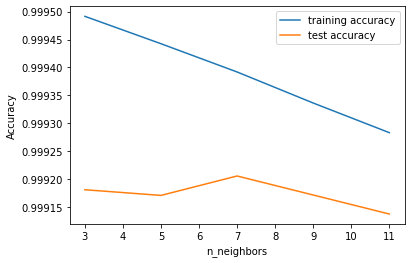

In [5]:
training_accuracy = []
test_accuracy = []
neighbors_settings = [3, 5, 7, 9, 11]
print(neighbors_settings)
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [6]:
%%time
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

Wall time: 45.8 s


KNeighborsClassifier(n_neighbors=7)

### Model Summary 

In [7]:
y_pred = model.predict(X_test)

In [8]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[   196      0      0     99      0      0      0]
 [     0 292645      0      0    517      0      1]
 [     0      1 284507      0      1      3      0]
 [   101      0      0    346      0      0      2]
 [     0    353      1      2 184343      0      1]
 [     2      5      4      1      1 309289      3]
 [     0      0      0      0      0      0 310534]]
              precision    recall  f1-score   support

   DDoS-HTTP     0.6555    0.6644    0.6599       295
    DDoS-TCP     0.9988    0.9982    0.9985    293163
    DDoS-UDP     1.0000    1.0000    1.0000    284512
    DoS-HTTP     0.7723    0.7706    0.7715       449
     DoS-TCP     0.9972    0.9981    0.9976    184700
     DoS-UDP     1.0000    0.9999    1.0000    309305
      Normal     1.0000    1.0000    1.0000    310534

    accuracy                         0.9992   1382958
   macro avg     0.9177    0.9187    0.9182   1382958
weighted avg     0.9992    0.9992    0.9992   1382958



### Dateset Test Prediction 

In [11]:
a = 0
b = 0
for x in range(0, len(y_pred)):
    if (y_pred[x] == y_test[x]):
        a += 1
    else:
        b += 1
print('Classification Data')
print('Accurate :',a, 'Loss :',b)

Classification Data
Accurate : 1381860 Loss : 1098


In [12]:
DDoS_TCP = 0
DDoS_UDP = 0
DoS_TCP = 0
DoS_UDP = 0
DDoS_HTTP = 0
DoS_HTTP = 0
Normal = 0
DDoS_TCP_Loss = 0
DDoS_UDP_Loss = 0
DoS_TCP_Loss = 0
DoS_UDP_Loss = 0
DDoS_HTTP_Loss = 0
DoS_HTTP_Loss = 0
Normal_Loss = 0
success=0
loss = 0

for x in range(0, len(y_pred)):
    if (y_pred[x] == y_test[x]):
        success += 1
        if (y_pred[x] == 'DDoS-TCP'):
            DDoS_TCP += 1
        elif (y_pred[x] == 'DDoS-UDP'):
            DDoS_UDP += 1
        elif (y_pred[x] == 'DoS-TCP'):
            DoS_TCP += 1
        elif (y_pred[x] == 'DoS-UDP'):
            DoS_UDP += 1
        elif (y_pred[x] == 'DDoS-HTTP'):
          DDoS_HTTP += 1
        elif (y_pred[x] == 'DoS-HTTP'):
          DoS_HTTP += 1
        elif (y_pred[x] == 'Normal'):
            Normal += 1
    elif (y_pred[x] != y_test[x]):
        loss += 1
        if (y_test[x] == 'DDoS-TCP'):
            DDoS_TCP_Loss += 1
        elif (y_test[x] == 'DDoS-UDP'):
            DDoS_UDP_Loss += 1
        elif (y_test[x] == 'DoS-TCP'):
            DoS_TCP_Loss += 1
        elif (y_test[x] == 'DoS-UDP'):
            DoS_UDP_Loss += 1
        elif (y_test[x] == 'DDoS-HTTP'):
            DDoS_HTTP_Loss += 1
        elif (y_test[x] == 'DoS-HTTP'):
            DoS_HTTP_Loss += 1
        elif (y_test[x] == 'Normal'):
            Normal_Loss += 1
print('Classification Data')
print('DDoS-TCP :',DDoS_TCP, 'DDoS-UDP :',DDoS_UDP, 'DoS-TCP :',DoS_TCP, 'DoS-UDP :',DoS_UDP, 'DDoS-HTTP :',DDoS_HTTP, 'DoS-HTTP :',DoS_HTTP, 'Normal :',Normal)
print('DDoS-TCP-Loss :',DDoS_TCP_Loss, 'DDoS-UDP-Loss :',DDoS_UDP_Loss,'DoS-TCP-Loss :',DoS_TCP_Loss, 'DoS-UDP-Loss :',DoS_UDP_Loss, 'DDoS-HTTP-Loss :',DDoS_HTTP_Loss, 'DoS-HTTP-Loss :',DoS_HTTP_Loss, 'Normal-Loss :',Normal_Loss)
print('Success :', success, 'Loss :', loss)

Classification Data
DDoS-TCP : 292645 DDoS-UDP : 284507 DoS-TCP : 184343 DoS-UDP : 309289 DDoS-HTTP : 196 DoS-HTTP : 346 Normal : 310534
DDoS-TCP-Loss : 518 DDoS-UDP-Loss : 5 DoS-TCP-Loss : 357 DoS-UDP-Loss : 16 DDoS-HTTP-Loss : 99 DoS-HTTP-Loss : 103 Normal-Loss : 0
Success : 1381860 Loss : 1098
